In [22]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
%matplotlib inline
import datetime

In [2]:
data = pd.read_csv('/Users/shubhvarma/Downloads/cryptory_price.csv', index_col=0)

In [3]:
data.head()

,date,open,high,low,close,volume,market cap,coin,close_satoshi,high_satoshi
0,2018-04-29,9346.41,9531.49,9193.71,9419.08,8853000000,158928000000,bitcoin,1.0,1.011934
1,2018-04-28,8939.27,9412.09,8931.99,9348.48,7805480000,151991000000,bitcoin,1.0,1.006804
2,2018-04-27,9290.63,9375.47,8987.05,8987.05,7566290000,157948000000,bitcoin,1.0,1.043220
3,2018-04-26,8867.32,9281.51,8727.09,9281.51,8970560000,150736000000,bitcoin,1.0,1.000000
4,2018-04-25,9701.03,9745.32,8799.84,8845.74,11083100000,164893000000,bitcoin,1.0,1.101696


#### A look at the universe of cryptocurrencies in this dataset

In [15]:
print("Number of coins:",len(data['coin'].unique()))
print("Coin List:\n\n",data['coin'].unique().tolist())

Number of coins: 1582
Coin List:

 ['bitcoin', 'ethereum', 'ripple', 'bitcoin-cash', 'eos', 'litecoin', 'cardano', 'stellar', 'iota', 'neo', 'tron', 'monero', 'dash', 'nem', 'tether', 'vechain', 'ethereum-classic', 'qtum', 'omisego', 'binance-coin', 'icon', 'bitcoin-gold', 'lisk', 'zcash', 'bitcoin-private', 'nano', 'verge', 'bytecoin-bcn', 'bytom', 'steem', 'populous', 'wanchain', 'bitshares', 'siacoin', 'bitcoin-diamond', 'zilliqa', 'dogecoin', 'stratis', 'maker', 'ontology', 'decred', 'digixdao', 'aeternity', 'waves', '0x', 'status', 'aion', 'rchain', 'golem-network-tokens', 'augur', 'loopring', 'basic-attention-token', 'mixin', 'waltonchain', 'hshare', 'ardor', 'komodo', 'iostoken', 'digibyte', 'kucoin-shares', 'ark', 'centrality', 'pivx', 'dentacoin', 'dragonchain', 'mithril', 'cryptonex', 'syscoin', 'qash', 'aelf', 'gas', 'storm', 'substratum', 'factom', 'kyber-network', 'ethos', 'monacoin', 'veritaseum', 'cortex', 'pundi-x', 'nebulas-token', 'reddcoin', 'bancor', 'funfair', 'ela

In [26]:
#convert date to datetime
data['date'] = pd.to_datetime(data['date'])
print("Date Range:", data['date'].min(), "-", data['date'].max())

Date Range: 2017-01-01 00:00:00 - 2018-04-29 00:00:00


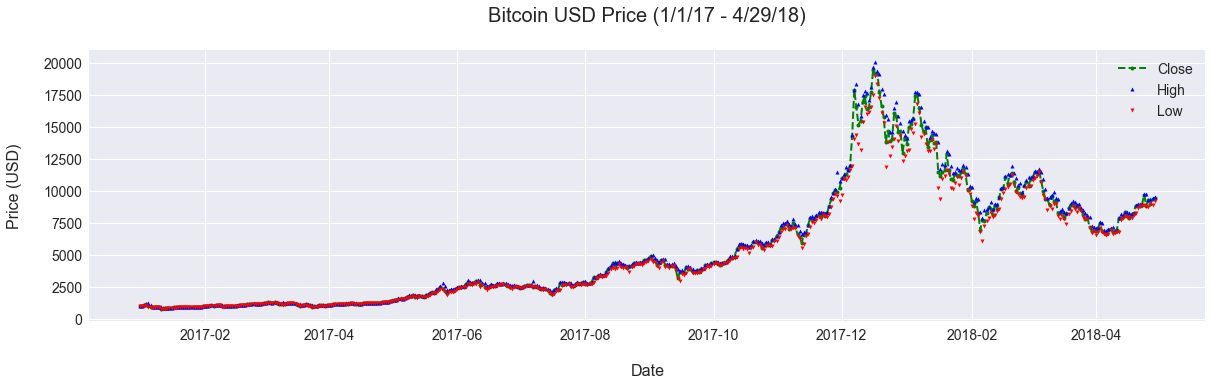

In [166]:
#plot bitcoin
plt.figure(figsize=(20,5))
data_btc = data[data['coin'] == 'bitcoin']
plt.plot(data_btc['date'], data_btc['close'], 'go-', linewidth=2, markersize=4, linestyle = '--', color = 'g')
plt.plot(data_btc['date'], data_btc['high'], '^', markersize=4, color = 'b')
plt.plot(data_btc['date'], data_btc['low'], 'v', markersize=4, color = 'r')
plt.xlabel('\nDate', fontsize = 16)
plt.ylabel('Price (USD)\n', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Bitcoin USD Price (1/1/17 - 4/29/18)\n', fontsize = 20)
plt.legend(['Close','High','Low'], fontsize = 14)

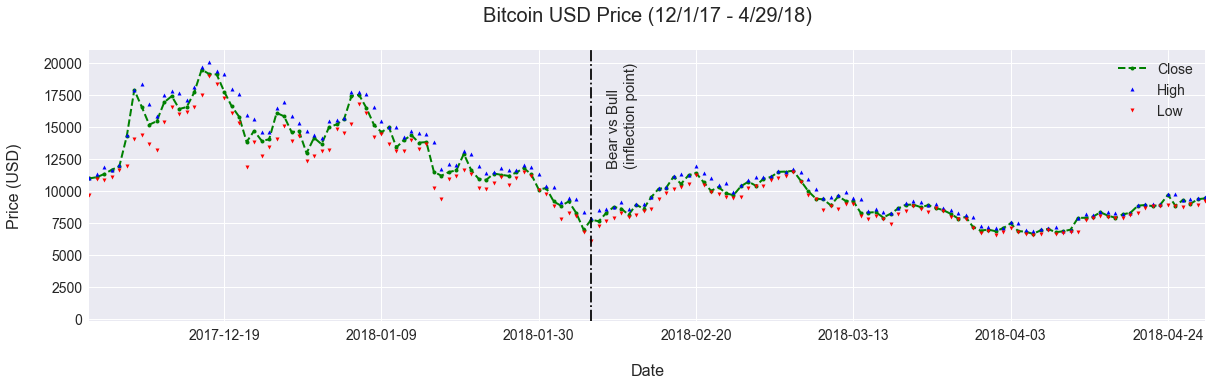

In [259]:
#let's zoom in on December, 2017 onwards, covering both the bull and bear market
plt.figure(figsize=(20,5))
data_btc = data[data['coin'] == 'bitcoin']
plt.xlim(pd.to_datetime('2017-12-01'),pd.to_datetime('2018-04-29'))
plt.plot(data_btc['date'], data_btc['close'], 'go-', linewidth=2, markersize=4, linestyle = '--', color = 'g')
plt.plot(data_btc['date'], data_btc['high'], '^', markersize=4, color = 'b')
plt.plot(data_btc['date'], data_btc['low'], 'v', markersize=4, color = 'r')
plt.text(data_btc['date'][np.argmin(data_btc[data_btc['date'] > pd.to_datetime('2017-12-01')]['low'])],
         data_btc['close'][np.argmin(data_btc[data_btc['date'] > pd.to_datetime('2017-12-01')]['low'])] + 4000,
         '\nBear vs Bull\n(inflection point)',va='bottom',rotation=90, fontsize=15)
plt.xlabel('\nDate', fontsize = 16)
plt.ylabel('Price (USD)\n', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Bitcoin USD Price (12/1/17 - 4/29/18)\n', fontsize = 20)
plt.legend(['Close','High','Low'], fontsize = 14)
plt.axvline(data_btc['date'][np.argmin(data_btc[data_btc['date'] > pd.to_datetime('2017-12-01')]['low'])], 
            color = 'black', linestyle = '-.', )

#next: show maximum drawdown in bear market and bull market

Maximum 24h percentage change: 0.230634399911
Minimum 24h percentage change: -0.20157879741
Mean 24h percentage change: -0.003302877679446373
Standard Deviation 24h percentage change: 0.05180606523206564

Days above 1 stdev: 67 , 0.138429752066
Days below 1 stdev: 52 , 0.107438016529
Total days: 484


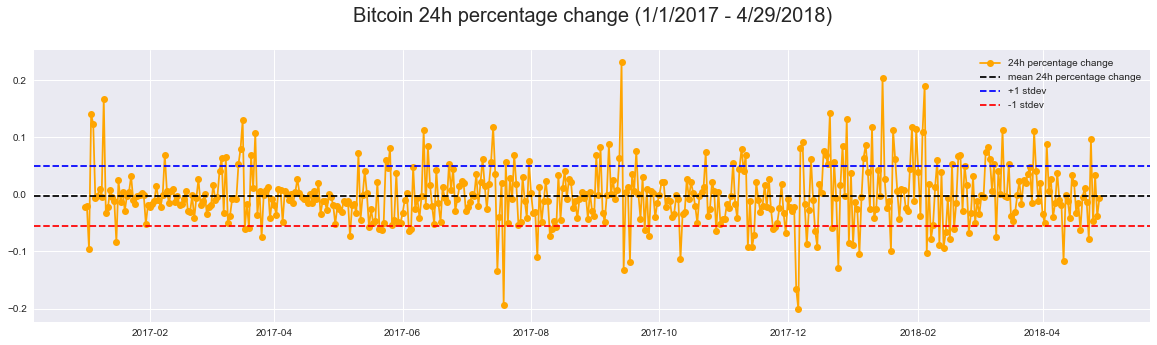

In [130]:
#let's look at daily change and percentage change
plt.figure(figsize=(20,5))
plt.plot(data_btc['date'], data_btc['close'].pct_change(), 'go-', color='orange')
plt.axhline(np.mean(data_btc['close'].pct_change()), color = 'black',linestyle = '--')
plt.axhline(np.mean(data_btc['close'].pct_change()) + np.std(data_btc['close'].pct_change()), color = 'b',linestyle = '--')
plt.axhline(np.mean(data_btc['close'].pct_change()) - np.std(data_btc['close'].pct_change()), color = 'r',linestyle = '--')
plt.legend(['24h percentage change', 'mean 24h percentage change', '+1 stdev', '-1 stdev'])
plt.title('Bitcoin 24h percentage change (1/1/2017 - 4/29/2018)\n', fontsize = 20)
print("Maximum 24h percentage change:",np.max(data_btc['close'].pct_change()))
print("Minimum 24h percentage change:",np.min(data_btc['close'].pct_change()))
print("Mean 24h percentage change:",np.mean(data_btc['close'].pct_change()))
print("Standard Deviation 24h percentage change:",np.std(data_btc['close'].pct_change()))

above_1stdev = np.sum(data_btc['close'].pct_change() > np.mean(data_btc['close'].pct_change()) + np.std(data_btc['close'].pct_change()))
below_1stdev = np.sum(data_btc['close'].pct_change() < np.mean(data_btc['close'].pct_change()) - np.std(data_btc['close'].pct_change()))
print("\nDays above 1 stdev:", above_1stdev,",", above_1stdev/len(data_btc['date']))
print("Days below 1 stdev:",below_1stdev,",", below_1stdev/len(data_btc['date']))
print("Total days:", len(data_btc['date']))

Maximum weekly percentage change: 0.624149745445
Minimum weekly percentage change: -0.428280920909
Mean weekly percentage change: -0.022513797065395486
Standard Deviation weekly percentage change: 0.1388991505150926
\Observations above 1 stdev: 68 , 0.140495867769
Observations below 1 stdev: 67 , 0.138429752066
Total Observations: 484


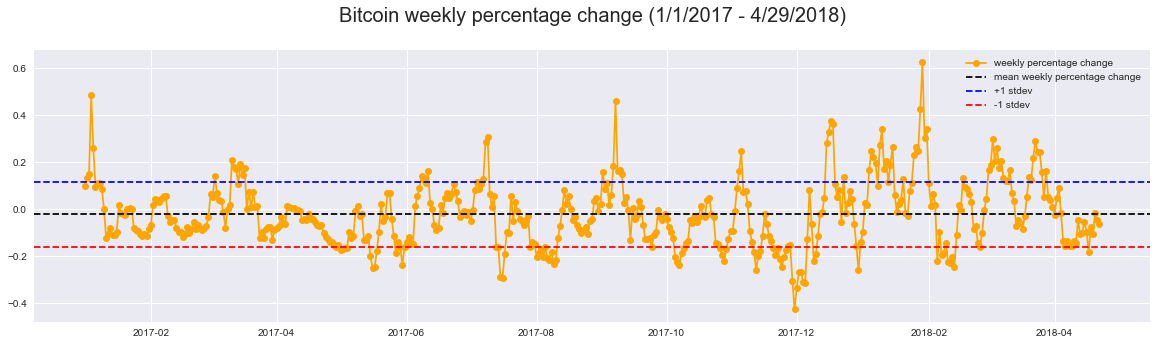

In [138]:
#now let's look at weekly percentage change
#let's look at daily change and percentage change
plt.figure(figsize=(20,5))
plt.plot(data_btc['date'], data_btc['close'].pct_change(7), 'go-', color='orange')
plt.axhline(np.mean(data_btc['close'].pct_change(7)), color = 'black',linestyle = '--')
plt.axhline(np.mean(data_btc['close'].pct_change(7)) + np.std(data_btc['close'].pct_change(7)), color = 'b',linestyle = '--')
plt.axhline(np.mean(data_btc['close'].pct_change(7)) - np.std(data_btc['close'].pct_change(7)), color = 'r',linestyle = '--')
plt.legend(['weekly percentage change', 'mean weekly percentage change', '+1 stdev', '-1 stdev'])
plt.title('Bitcoin weekly percentage change (1/1/2017 - 4/29/2018)\n', fontsize = 20)
print("Maximum weekly percentage change:",np.max(data_btc['close'].pct_change(7)))
print("Minimum weekly percentage change:",np.min(data_btc['close'].pct_change(7)))
print("Mean weekly percentage change:",np.mean(data_btc['close'].pct_change(7)))
print("Standard Deviation weekly percentage change:",np.std(data_btc['close'].pct_change(7)))

above_1stdev = np.sum(data_btc['close'].pct_change(7) > np.mean(data_btc['close'].pct_change(7)) + np.std(data_btc['close'].pct_change(7)))
below_1stdev = np.sum(data_btc['close'].pct_change(7) < np.mean(data_btc['close'].pct_change(7)) - np.std(data_btc['close'].pct_change(7)))
print("\Observations above 1 stdev:", above_1stdev,",", above_1stdev/len(data_btc['date']))
print("Observations below 1 stdev:",below_1stdev,",", below_1stdev/len(data_btc['date']))
print("Total Observations:", len(data_btc['date']))

#### Clearly, bitcoin price is very volatile. Daily movement standard deviation is 5% and weekly volatility is almost 14%! Now let's look at recent market (December, 2017 onwards) to see if the market has stabilized at all. 
#### However, it is important to note that 80% of the days had a weekly percentage change within 1 standard deviation (assuming a normal distribution, this number is around 68%), likely implying some sort of lognormal distribution

Maximum 24h percentage change: 0.202715286541
Minimum 24h percentage change: -0.20157879741
Mean 24h percentage change: 0.003148617520853388
Standard Deviation 24h percentage change: 0.06416283402319081

Days above 1 stdev: 22 , 0.147651006711
Days below 1 stdev: 21 , 0.140939597315
Total days: 149


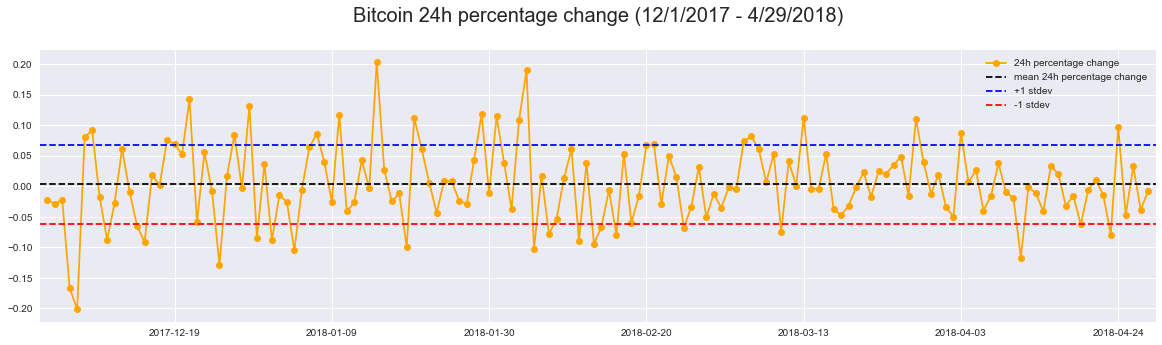

In [143]:
#let's zoom in on the dataset to analyze the more recent market. Dec 2017 - Apr 2018
data_slice = data_btc[data_btc['date'] > pd.to_datetime('2017-12-01')]

plt.figure(figsize=(20,5))
plt.xlim(pd.to_datetime('2017-12-01'),pd.to_datetime('2018-04-29'))
plt.plot(data_slice['date'], data_slice['close'].pct_change(), 'go-', color='orange')
plt.axhline(np.mean(data_slice['close'].pct_change()), color = 'black',linestyle = '--')
plt.axhline(np.mean(data_slice['close'].pct_change()) + np.std(data_slice['close'].pct_change()), color = 'b',linestyle = '--')
plt.axhline(np.mean(data_slice['close'].pct_change()) - np.std(data_slice['close'].pct_change()), color = 'r',linestyle = '--')
plt.legend(['24h percentage change', 'mean 24h percentage change', '+1 stdev', '-1 stdev'])
plt.title('Bitcoin 24h percentage change (12/1/2017 - 4/29/2018)\n', fontsize = 20)
print("Maximum 24h percentage change:",np.max(data_slice['close'].pct_change()))
print("Minimum 24h percentage change:",np.min(data_slice['close'].pct_change()))
print("Mean 24h percentage change:",np.mean(data_slice['close'].pct_change()))
print("Standard Deviation 24h percentage change:",np.std(data_slice['close'].pct_change()))

above_1stdev = np.sum(data_slice['close'].pct_change() > np.mean(data_slice['close'].pct_change()) + np.std(data_slice['close'].pct_change()))
below_1stdev = np.sum(data_slice['close'].pct_change() < np.mean(data_slice['close'].pct_change()) - np.std(data_slice['close'].pct_change()))
print("\nDays above 1 stdev:", above_1stdev,",", above_1stdev/len(data_slice['date']))
print("Days below 1 stdev:",below_1stdev,",", below_1stdev/len(data_slice['date']))
print("Total days:", len(data_slice['date']))

Maximum weekly percentage change: 0.624149745445
Minimum weekly percentage change: -0.315737795285
Mean weekly percentage change: 0.03200371063358707
Standard Deviation weekly percentage change: 0.16885644875425473

Observations above 1 stdev: 25 , 0.167785234899
Observations below 1 stdev: 24 , 0.161073825503
Total Observations: 149


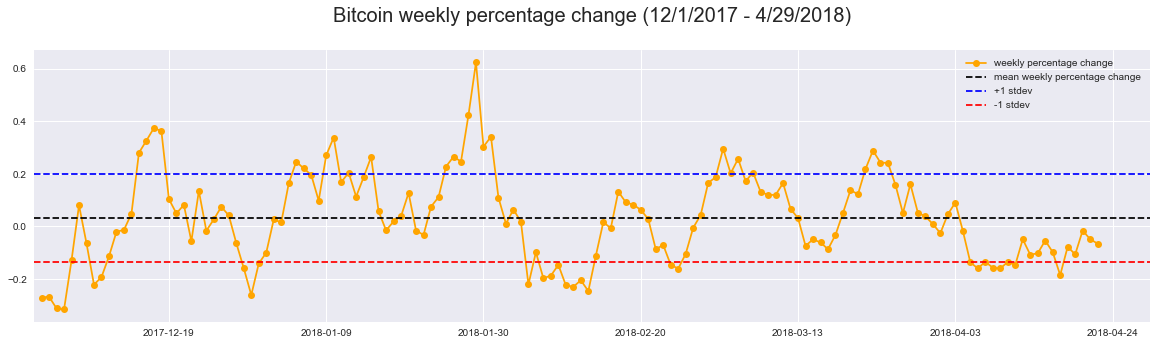

In [142]:
#let's zoom in on the dataset to analyze the more recent market. Dec 2017 - Apr 2018
data_slice = data_btc[data_btc['date'] > pd.to_datetime('2017-12-01')]

plt.figure(figsize=(20,5))
plt.xlim(pd.to_datetime('2017-12-01'),pd.to_datetime('2018-04-29'))
plt.plot(data_slice['date'], data_slice['close'].pct_change(7), 'go-', color='orange')
plt.axhline(np.mean(data_slice['close'].pct_change(7)), color = 'black',linestyle = '--')
plt.axhline(np.mean(data_slice['close'].pct_change(7)) + np.std(data_slice['close'].pct_change(7)), color = 'b',linestyle = '--')
plt.axhline(np.mean(data_slice['close'].pct_change(7)) - np.std(data_slice['close'].pct_change(7)), color = 'r',linestyle = '--')
plt.legend(['weekly percentage change', 'mean weekly percentage change', '+1 stdev', '-1 stdev'])
plt.title('Bitcoin weekly percentage change (12/1/2017 - 4/29/2018)\n', fontsize = 20)
print("Maximum weekly percentage change:",np.max(data_slice['close'].pct_change(7)))
print("Minimum weekly percentage change:",np.min(data_slice['close'].pct_change(7)))
print("Mean weekly percentage change:",np.mean(data_slice['close'].pct_change(7)))
print("Standard Deviation weekly percentage change:",np.std(data_slice['close'].pct_change(7)))

above_1stdev = np.sum(data_slice['close'].pct_change(7) > np.mean(data_slice['close'].pct_change(7)) + np.std(data_slice['close'].pct_change(7)))
below_1stdev = np.sum(data_slice['close'].pct_change(7) < np.mean(data_slice['close'].pct_change(7)) - np.std(data_slice['close'].pct_change(7)))
print("\nObservations above 1 stdev:", above_1stdev,",", above_1stdev/len(data_slice['date']))
print("Observations below 1 stdev:",below_1stdev,",", below_1stdev/len(data_slice['date']))
print("Total Observations:", len(data_slice['date']))

#### The recent market seems to be leaning toward a normal distribution as just around 68% of the weekly volatility lies within 1 standard deviation. Additionally, both the mean percentage change and standard deviation are slightly larger, implying there is greater volatility in closing price movement in the recent market.

#### The next step will be to separate the bull market in Dec and compare it to the bear market (Jan-Mar).

#### Helper functions

In [135]:
#calculate number of weeks, given two dates
from dateutil import rrule
import datetime
def weeks_between(start_date, end_date):
    weeks = rrule.rrule(rrule.WEEKLY, dtstart=start_date, until=end_date)
    return weeks.count()